<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [2]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [3]:
##### Your Code Here #####\
import requests
import bs4
from bs4 import BeautifulSoup
URL = 'https://www.indeed.com/q-data-scientist-$90,000-l-New-York,-NY-jobs.html'
URL2='https://www.indeed.com/jobs?q=data+scientist+%2490%2C000&l=New+York%2C+NY&start=10'
page = requests.get(URL)
soup = BeautifulSoup(page.text, "html.parser")



In [4]:
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <script src="/s/e884308/en_US.js" type="text/javascript">
  </script>
  <script>
   window.indeed=window.indeed||{};indeed.crashtext=indeed.crashtext||{};indeed.crashtext.populate=indeed.crashtext.populate||function(c,g){var d=window[g];if(d){var e=d[""]||{},h=e.salt;if(e.hasOwnProperty("salt"))for(var b in c){for(var a=void 0,a=h,f=b.length;f;)a=33*a^b.charCodeAt(--f);a>>>=0;e.hasOwnProperty("id_length")&&(a=String(a).substring(0,e.id_length));d[a]=c[b]}else for(b in c)d[b]=[null].concat(c[b])}};indeed.crashtext.populate({"Save jobs and view them from any computer.":["Not ready to apply? Save job to apply later"],"indeedapply_serp_label":["Easy apply"],"You must sign in to save jobs:":["To do so:"]}, 'indeed.i18n.localeData')
  </script>
  <link href="/s/22362dc/jobsearch_all.css" rel="stylesheet" type="text/css"/>
  <link href="http://rss.indeed.com/rss?q=data+sc

In [5]:
def extract_job_title_from_result(soup): 
    jobs = []
    for div in soup.find_all(name='div', attrs={'class':'row'}):
        for a in div.find_all(name='a', attrs={'data-tn-element':'jobTitle'}):
            jobs.append(a['title'])
    return(jobs)
extract_job_title_from_result(soup)

['Senior Data Scientist, Lead',
 'Data Scientist – ESPN+',
 'Natural Language Processing Data Scientist- Audit',
 'Data Scientist',
 'Data Scientist - Experimentation',
 'Data Science Full-Time Student Opportunity (Graduate)',
 'Internship in Quantitative Research (Data Science, Machine Learning, Mathematical Modelling)',
 'Chief Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist, MO for Economic Opportunity',
 'Data Scientist',
 'Senior Data Scientist',
 'Data Scientist, MO for Economic Opportunity',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Enterprise Data - Quant Researcher (Machine Learning)']

In [6]:
def extract_company_from_result(soup): 
    companies = []
    for div in soup.find_all(name='div', attrs={'class':'row'}):
        company = div.find_all(name='span', attrs={'class':'company'})
        if len(company) > 0:
            for b in company:
                companies.append(b.text.strip())
        else:
            sec_try = div.find_all(name='span', attrs={'class':'result-link-source'})
            for span in sec_try:
                companies.append(span.text.strip())
    return(companies)
 
extract_company_from_result(soup)

['Eskalera Inc.',
 'Disney Streaming Services',
 'Capital One',
 'JobRobin',
 'Disney Streaming Services',
 'CVS Health',
 'G-Research',
 'BrainWorks',
 'FanDuel',
 'AETNA',
 'Deloitte',
 'New York City MAYORS OFFICE OF CONTRACT SVCS',
 'Pond5',
 'Daily Harvest',
 "Mayor's Office of Contract Services",
 'JobRobin',
 'SILICON CONSULTING SERVICES',
 'DISH',
 'Bloomberg']

In [7]:

def job_links(url):
    """Collects the links for all the listing on a search results page."""
    html_doc = requests.get(URL)
    soup = BeautifulSoup(html_doc.content, 'html.parser')
    all_content = soup.find_all('div',class_='title')
    link_list = []
    for i in all_content:
        link = i.find('a', class_='jobtitle')['href']
        link_list.append(f"https://www.indeed.com{link}")
 
    return(link_list)


In [8]:
job_links(URL)

['https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0C-wIR9HnnWAb3omIwSft6ef7V4Na-alUKjTpWUiR2p-idA4MZ8GyHBWmojlZOPCJNosWGx-LSChCiR_fCH_2Z02VCeZyhae6VGCDHfF0TmwDPbLflto1VW14UHKjpdht1M7ouE5q-QOEvg2pg1kYxWNSrufVAXqX_ixqgWI2SOahV6mccPJZMf1xbvbtzEGSdfjQY8h3dWtgfNhz1xvOyxSjBnOyZ9Wcre899sW1zqd6Zjt-onZ3YcuUompO9Hmx3X2oWgTBwDh_0BYEkYGgkeXzWtlWRXg6IMigC_rjXJPtMdQbKFco9JsRFeVy7u2Oz10VybpgTlg9qEoeKEm1uzSPrQjz13bMfPyY86wmGmSfHk--DAbcCeFmAAZ4YvkbQJ2UhZ2wFItKhD9igGn0d5qdV-qgPfGiKWSg2DOjzyssY0N-gd8KFtPJRcXhzrATbrM4JcYlJ4QQYgmqApJ32asEWXcdvqTJeMkLj2echQCTkv4Hfwi1RGf6bKUHu-a-X2qMrkpAct-WP1kI8TEp_MwOTdcfapPQmuormhC98AEnOILqd3wK6PsuowEMprC_hQ1zvesZ5f6w==&p=0&fvj=0&vjs=3',
 'https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0C5gOuSRI8mZKXCZS4HWTV2ATI_JsbBeHG95gtyzD7lGc7BDZlOnbDjWlqPS7PrGEeR1eyuS8u5GTyKsj2hPnNv8iVHS5M4BRcERk0ukmmR0tb0ibOE43j_YkzF2ecsFeuGQdtSdpbw7PtAfEElSseCxZLLPuQz-oksAGq40PPFdc5Yz8BvNuYC_dW1lTZhRjJOyYVorjdkQLy5ywhJHO6Cm1-Y79HBivfnIg-8f1tlwAx77PmLnYtRCoOwbf92iuVMMQNS4VHOZiUGlLKCe55Mqt9lp

In [10]:
def extract_summary_from_result(soup): 
    summaries = []
    spans = soup.findAll('div', attrs={'class': 'summary'})
    for span in spans:
        summaries.append(span.text.strip())
    return(summaries)
extract_summary_from_result(soup)

['At Eskalera, our ultimate vision is an environment where every worker, regardless of background, pedigree, race, geography etc, gets a fair shot, and where AI…',
 'Data Scientists in the ESPN+ Analytics team focus on informing content decisions for ESPN+ through data modeling, analysis, and actionable insight generation.',
 'McLean 2 (19052), United States of America, McLean, Virginia. At Capital One, we’re building a leading information-based technology company.',
 "We're bringing predictive forecasting to major supply chain and cpg companies around the world. Our clients are some of the most recognized consumer product…",
 'Disney Streaming Services (DSS) is creating the future of digital video entertainment products for one of the largest media brands in the world.',
 "Data Science Full-Time Student Opportunity (Graduate). Aetna, a CVS Health company, is the nation's premier health innovation company helping people on their…",
 'Relocation to London is required. G-Research is a le

In [11]:
len(extract_summary_from_result(soup))

19

In [12]:
###CREATE DATAFRAME
columns = ['job_title', 'company_name', 'summary']
df = pd.DataFrame(columns = columns)

In [13]:
import time
for start in range(0, 200, 10):
    page = requests.get('https://www.indeed.com/jobs?q=data+scientist+%2490%2C000&l=New+York%2C+NY'+ '&start=' + str(start))
    time.sleep(1)  #ensuring at least 1 second between page grabs
    soup = BeautifulSoup(page.text, 'lxml', from_encoding="utf-8")
    for div in soup.find_all(name='div', attrs={'class':'row'}):                  
        #specifying row num for index of job posting in dataframe
        num = (len(df) + 1) 
        #creating an empty list to hold the data for each posting
        job_post = [] 
        #grabbing job title
        for a in div.find_all(name='a', attrs={'data-tn-element':'jobTitle'}):
            job_post.append(a['title']) 
        #grabbing company name
        company = div.find_all(name='span', attrs={'class':'company'}) 
        if len(company) > 0: 
            for b in company:
                job_post.append(b.text.strip()) 
        else: 
            sec_try = div.find_all(name='span', attrs={'class':'result-link-source'})
            for span in sec_try:
                job_post.append(span.text) 
        #grabbing summary text
        d = div.findAll(name='div', attrs={'class': 'summary'}) 
        for span in d:
            job_post.append(span.text.strip()) 

        #appending list of job post info to dataframe at index num
        df.loc[num] = job_post


//anaconda3/lib/python3.7/site-packages/bs4/__init__.py:191: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


In [14]:
df.head()

,job_title,company_name,summary
1,Data Scientist – ESPN+,Disney Streaming Services,These analysts focus on improving business res...
2,Data Scientist - Experimentation,Disney Streaming Services,Disney Streaming Services (DSS) is creating th...
3,Data Scientist,Systech Corp,Work with other data scientists with a broad r...
4,Senior Data Analyst,JobRobin,As one of the top internet media & news compan...
5,Software Engineer - C++ / Computer Vision,Logikk Limited,With numerous partnerships with global organis...


## 2) Use Spacy to tokenize / clean the listings 

In [15]:
##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

SyntaxError: unexpected EOF while parsing (<ipython-input-15-9cfb6145a733>, line 2)

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA


In [17]:
df['summary'].head()

1    These analysts focus on improving business res...
2    Disney Streaming Services (DSS) is creating th...
3    Work with other data scientists with a broad r...
4    As one of the top internet media & news compan...
5    With numerous partnerships with global organis...
Name: summary, dtype: object

In [18]:
df.shape

(328, 3)

In [19]:
# Start here 
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [20]:
STOP_WORDS = spacy.lang.en.stop_words.STOP_WORDS
def lemmas(df):
    
    sl = []
    doc = nlp(df)

    for token in doc: 
        if ((token.text not in STOP_WORDS) and (token.is_punct == False) and(token.like_num == False) and (token.pos_!= 'PRON') and (token.pos_!= '-PRON-')):
            sl.append(token.lemma_)

    return sl

In [21]:
df['lemmas'] = df['summary'].apply(lemmas)

In [22]:
df.head()


,job_title,company_name,summary,lemmas
1,Data Scientist – ESPN+,Disney Streaming Services,These analysts focus on improving business res...,"[these, analyst, focus, improve, business, res..."
2,Data Scientist - Experimentation,Disney Streaming Services,Disney Streaming Services (DSS) is creating th...,"[Disney, Streaming, Services, DSS, create, fut..."
3,Data Scientist,Systech Corp,Work with other data scientists with a broad r...,"[work, datum, scientist, broad, range, analyti..."
4,Senior Data Analyst,JobRobin,As one of the top internet media & news compan...,"[as, internet, medium, news, company, partner,..."
5,Software Engineer - C++ / Computer Vision,Logikk Limited,With numerous partnerships with global organis...,"[with, numerous, partnership, global, organisa..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [ ]:
##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [23]:
vect= CountVectorizer(stop_words='english')

In [24]:

vect.fit(df['summary'])
 # transform text 
dtm = vect.transform(df['summary'])
# Use custom Spacy Vectorizer
dtm = pd.DataFrame(dtm.todense(), columns = vect.get_feature_names())
# BBC articles in `data` variable 

In [25]:
dtm.head()

,000,10,100,11,13,19052,19th,1b,1bn,200,...,worker,workflows,working,works,world,wow,written,years,york,yrs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [26]:
doc_len = [len(doc) for doc in df['summary']]

//anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


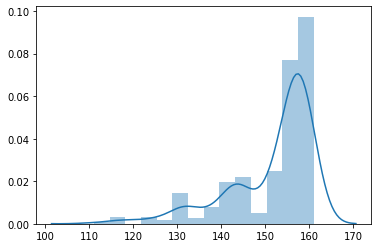

In [27]:
import seaborn as sns
sns.distplot(doc_len)

In [49]:
## Common Words
from collections import Counter


In [50]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [51]:
wc = count(df['lemmas'])

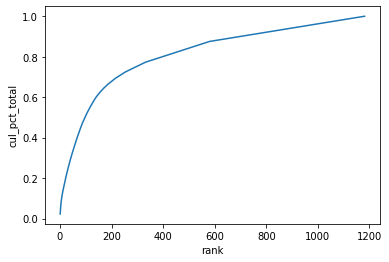

In [52]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

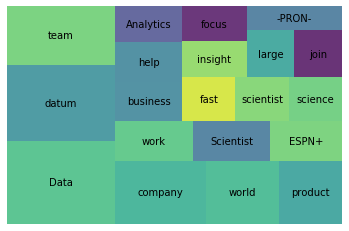

In [53]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [41]:
##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [43]:
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = 'english')

# Create a vocabulary and get word counts per document
sparse = tfidf.fit_transform(df['summary'])

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,000,10,100,11,13,19052,19th,1b,1bn,200,...,worker,workflows,working,works,world,wow,written,years,york,yrs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.199834,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [39]:
# Instantiate
from sklearn.neighbors import NearestNeighbors


# Fit on TF-IDF Vectors
nn  = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [40]:
nn.kneighbors(dtm)

(array([[0.        , 4.35889894, 4.35889894, 4.35889894, 4.35889894],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 4.24264069, 4.35889894, 4.58257569, 4.69041576],
        ...,
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]),
 array([[  0,  98,  50,  17, 326],
        [164,  64,   1,  33,  36],
        [  2,  14, 299,  40, 143],
        ...,
        [ 37,  77, 134, 130,  34],
        [ 98, 116,  17, 326,  50],
        [293, 222, 167, 327, 117]]))

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 